# Covid-19 Detection from Lung X-rays
### Fateme Seyyed Dabbaghi 810197529
#### In this project, we examine neural network issues using the tensorflow library and using the high-level interface of keras. The purpose of this is to diagnose Covid 19 disease or pneumonia in CT scan images of the lungs. The input to this database includes a lung photo of healthy people with Covid 19 and pneumonia.


In [ ]:
!cp "/content/drive/MyDrive/Colab Notebooks/xray.zip" .

In [ ]:
!unzip xray.zip

In [ ]:
from tensorflow.keras import *
import matplotlib.pyplot as plt
import matplotlib.image 
from sklearn.metrics import classification_report
import numpy as np

In [ ]:
dataGenerator = preprocessing.image.ImageDataGenerator()
dataTrain = dataGenerator.flow_from_directory("/content/Data/train", target_size=(80,80), color_mode='grayscale', batch_size = 32)

Found 5144 images belonging to 3 classes.


In [ ]:
dataTest = dataGenerator.flow_from_directory("/content/Data/test", target_size=(80,80), color_mode='grayscale', batch_size = 32)

Found 1288 images belonging to 3 classes.


### Sample images

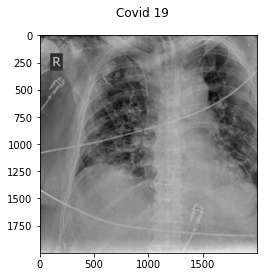

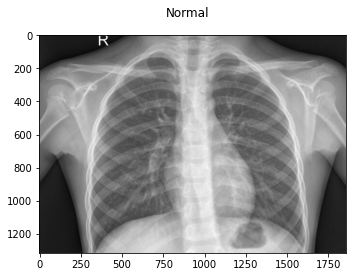

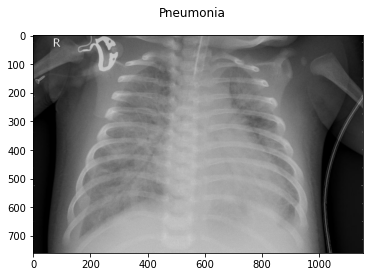

In [ ]:
covid = matplotlib.image.imread("/content/Data/train/COVID19/COVID19(0).jpg")
fig = plt.figure()
fig.suptitle('Covid 19')
plt.imshow(covid, cmap='gray') 

normal = matplotlib.image.imread("/content/Data/train/NORMAL/NORMAL(0).jpg")
fig = plt.figure()
fig.suptitle('Normal')
plt.imshow(normal, cmap='gray') 

pneumonia = matplotlib.image.imread("/content/Data/train/PNEUMONIA/PNEUMONIA(0).jpg")
fig = plt.figure()
fig.suptitle('Pneumonia')
plt.imshow(pneumonia, cmap='gray') 

### Bar plot

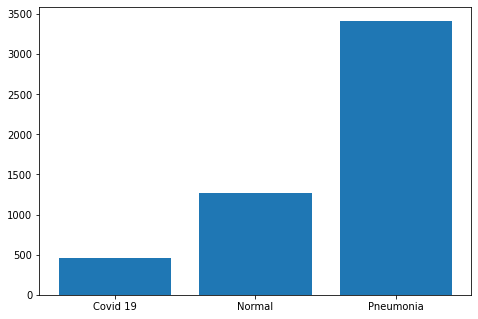

In [ ]:
d = dataTrain.classes
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
lung = ['Covid 19', 'Normal', 'Pneumonia']
data = [len(d[d==0]),len(d[d==1]),len(d[d==2])]
ax.bar(lung,data)
plt.show()

In [ ]:
dataTrain_unshuffle = dataGenerator.flow_from_directory("/content/Data/train", target_size=(80,80), color_mode='grayscale', batch_size = 32, shuffle=False)
dataTest_unshuffle = dataGenerator.flow_from_directory("/content/Data/test", target_size=(80,80), color_mode='grayscale', batch_size = 32, shuffle=False)
def r_p_f(model):
  print("--------------TRAIN--------------")
  y_true = dataTrain_unshuffle.labels
  y_pred = np.argmax(model.predict(dataTrain_unshuffle),axis=1)
  target_names = ['Covid 19', 'Normal', 'Pneumonia']
  print(classification_report(y_true, y_pred, target_names=target_names))
  print("--------------TEST--------------")
  y_true = dataTest_unshuffle.labels
  y_pred = np.argmax(model.predict(dataTest_unshuffle),axis=1)
  target_names = ['Covid 19', 'Normal', 'Pneumonia']
  print(classification_report(y_true, y_pred, target_names=target_names))

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [ ]:
def plot_acc_loss(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'])
  plt.show()
  
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'])
  plt.show()

## Relu activation function

In [ ]:
input = layers.Input(shape=(80,80,1))
inp = layers.Flatten()(input)
second = layers.Dense(1024,activation='relu')(inp)
third = layers.Dense(1024,activation='relu')(second)
out = layers.Dense(3,activation='softmax')(third)
model = models.Model(inputs=input, outputs=out)
model.compile(optimizer=optimizers.SGD(learning_rate=0.01),loss='categorical_crossentropy', metrics=['accuracy'])

### Parameters of each layer

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 80, 80, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              6554624   
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 3075      
Total params: 7,607,299
Trainable params: 7,607,299
Non-trainable params: 0
_________________________________________________________________


The summary is textual and includes information about:

*   The layers and their order in the model.
*   The output shape of each layer.
*   The number of parameters (weights) in each layer.
*   The total number of parameters (weights) in the model.

For the first hidden layers number of parameters is 6554624 because with every hidden unit you have 6400 input weights and one weight of connection with bias. This means that every hidden unit gives you 6401 parameters. We have 1024 units so it sums up to 6554624.<br/>
For the same reason, the value of the parameters for other layers is also justified.

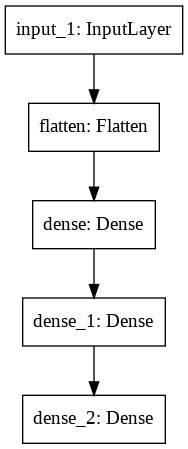

In [ ]:
utils.plot_model(model)

In [ ]:
history = model.fit(dataTrain, validation_data=dataTest, epochs=10)

Epoch 1/10
161/161 [==============================] - 146s 900ms/step - loss: nan - accuracy: 0.1434 - val_loss: nan - val_accuracy: 0.0901
Epoch 2/10
161/161 [==============================] - 145s 902ms/step - loss: nan - accuracy: 0.0948 - val_loss: nan - val_accuracy: 0.0901
Epoch 3/10
161/161 [==============================] - 148s 918ms/step - loss: nan - accuracy: 0.0916 - val_loss: nan - val_accuracy: 0.0901
Epoch 4/10
161/161 [==============================] - 149s 927ms/step - loss: nan - accuracy: 0.0942 - val_loss: nan - val_accuracy: 0.0901
Epoch 5/10
161/161 [==============================] - 147s 912ms/step - loss: nan - accuracy: 0.0923 - val_loss: nan - val_accuracy: 0.0901
Epoch 6/10
161/161 [==============================] - 145s 904ms/step - loss: nan - accuracy: 0.0971 - val_loss: nan - val_accuracy: 0.0901
Epoch 7/10
161/161 [==============================] - 145s 900ms/step - loss: nan - accuracy: 0.0863 - val_loss: nan - val_accuracy: 0.0901
Epoch 8/10
161/161 [

In [ ]:
r_p_f(model)

--------------TRAIN--------------


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    Covid 19       0.09      1.00      0.16       460
      Normal       0.00      0.00      0.00      1266
   Pneumonia       0.00      0.00      0.00      3418

    accuracy                           0.09      5144
   macro avg       0.03      0.33      0.05      5144
weighted avg       0.01      0.09      0.01      5144

--------------TEST--------------
              precision    recall  f1-score   support

    Covid 19       0.09      1.00      0.17       116
      Normal       0.00      0.00      0.00       317
   Pneumonia       0.00      0.00      0.00       855

    accuracy                           0.09      1288
   macro avg       0.03      0.33      0.06      1288
weighted avg       0.01      0.09      0.01      1288



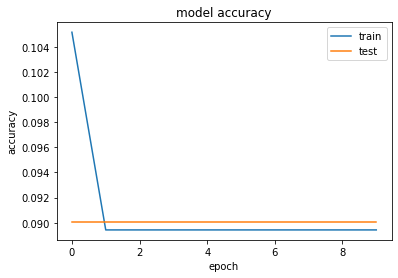

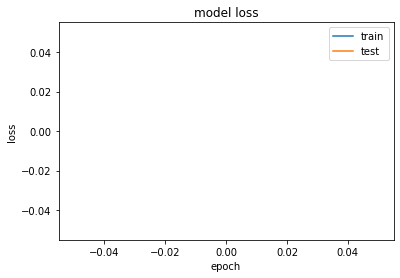

In [ ]:
plot_acc_loss(history)

It is possible for the updates to the weights to be so large that the weights either overflow or underflow their numerical precision. In our case in the first few batches, the amount of loss increases greatly and then overflows, resulting in no updates to the weights in subsequent epochs and the network does not improve.The reason for overflowing is that our input is not normalized and the relu activation function returns outputs larger than zero without change.

## Tanh activation function

In [ ]:
input = layers.Input(shape=(80,80,1))
inp = layers.Flatten()(input)
second = layers.Dense(1024,activation='tanh')(inp)
third = layers.Dense(1024,activation='tanh')(second)
out = layers.Dense(3,activation='softmax')(third)
model = models.Model(inputs=input, outputs=out)
model.compile(optimizer=optimizers.SGD(learning_rate=0.01),loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(dataTrain, validation_data=dataTest, epochs=10)

Epoch 1/10
161/161 [==============================] - 149s 921ms/step - loss: 1.4912 - accuracy: 0.5369 - val_loss: 0.9595 - val_accuracy: 0.6638
Epoch 2/10
161/161 [==============================] - 145s 899ms/step - loss: 1.0064 - accuracy: 0.5845 - val_loss: 0.8712 - val_accuracy: 0.6638
Epoch 3/10
161/161 [==============================] - 145s 899ms/step - loss: 0.8970 - accuracy: 0.6365 - val_loss: 0.8453 - val_accuracy: 0.6638
Epoch 4/10
161/161 [==============================] - 145s 899ms/step - loss: 0.8843 - accuracy: 0.6458 - val_loss: 0.8422 - val_accuracy: 0.6638
Epoch 5/10
161/161 [==============================] - 144s 898ms/step - loss: 0.9018 - accuracy: 0.6298 - val_loss: 0.8728 - val_accuracy: 0.6638
Epoch 6/10
161/161 [==============================] - 143s 890ms/step - loss: 0.8886 - accuracy: 0.6421 - val_loss: 0.8939 - val_accuracy: 0.6638
Epoch 7/10
161/161 [==============================] - 145s 902ms/step - loss: 0.8636 - accuracy: 0.6659 - val_loss: 0.8538 -

In [ ]:
r_p_f(model)

--------------TRAIN--------------


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    Covid 19       0.00      0.00      0.00       460
      Normal       0.00      0.00      0.00      1266
   Pneumonia       0.66      1.00      0.80      3418

    accuracy                           0.66      5144
   macro avg       0.22      0.33      0.27      5144
weighted avg       0.44      0.66      0.53      5144

--------------TEST--------------
              precision    recall  f1-score   support

    Covid 19       0.00      0.00      0.00       116
      Normal       0.00      0.00      0.00       317
   Pneumonia       0.66      1.00      0.80       855

    accuracy                           0.66      1288
   macro avg       0.22      0.33      0.27      1288
weighted avg       0.44      0.66      0.53      1288



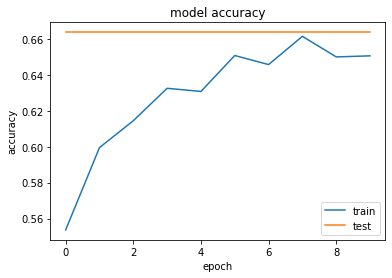

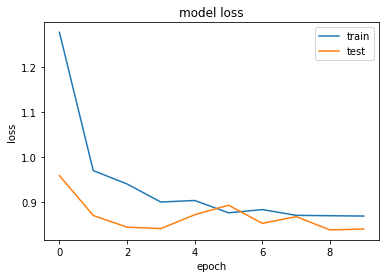

In [ ]:
plot_acc_loss(history)

This activation function is a smooth gradient. Output values bound between -1 and 1 (normalizing the output of each neuron and preventing overflowing). But Vanishing gradient—for very high or very low values of X is possible, there is almost no change to the prediction, causing a vanishing gradient problem. This can result in the network refusing to learn further, or being too slow to reach an accurate prediction. 

## Normalize data

In [ ]:
dataGenerator = preprocessing.image.ImageDataGenerator(rescale=1/255.0)
dataTrain = dataGenerator.flow_from_directory("/content/Data/train", target_size=(80,80), color_mode='grayscale', batch_size = 32)
dataTest = dataGenerator.flow_from_directory("/content/Data/test", target_size=(80,80), color_mode='grayscale', batch_size = 32)

input = layers.Input(shape=(80,80,1))
inp = layers.Flatten()(input)
second = layers.Dense(1024,activation='relu')(inp)
third = layers.Dense(1024,activation='relu')(second)
out = layers.Dense(3,activation='softmax')(third)

model = models.Model(inputs=input, outputs=out)

model.compile(optimizer=optimizers.SGD(learning_rate=0.01),loss='categorical_crossentropy', metrics=['accuracy'])

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [ ]:
history = model.fit(dataTrain, validation_data=dataTest, epochs=10)

Epoch 1/10
161/161 [==============================] - 145s 899ms/step - loss: 0.7134 - accuracy: 0.6946 - val_loss: 0.4049 - val_accuracy: 0.8470
Epoch 2/10
161/161 [==============================] - 144s 893ms/step - loss: 0.3786 - accuracy: 0.8529 - val_loss: 0.2466 - val_accuracy: 0.9123
Epoch 3/10
161/161 [==============================] - 143s 891ms/step - loss: 0.3486 - accuracy: 0.8745 - val_loss: 0.2229 - val_accuracy: 0.9193
Epoch 4/10
161/161 [==============================] - 144s 894ms/step - loss: 0.2786 - accuracy: 0.8952 - val_loss: 0.2036 - val_accuracy: 0.9278
Epoch 5/10
161/161 [==============================] - 143s 889ms/step - loss: 0.2781 - accuracy: 0.8951 - val_loss: 0.3752 - val_accuracy: 0.8618
Epoch 6/10
161/161 [==============================] - 143s 891ms/step - loss: 0.2514 - accuracy: 0.9021 - val_loss: 0.1939 - val_accuracy: 0.9231
Epoch 7/10
161/161 [==============================] - 144s 894ms/step - loss: 0.2667 - accuracy: 0.8941 - val_loss: 0.1797 -

In [ ]:
r_p_f(model)

--------------TRAIN--------------
              precision    recall  f1-score   support

    Covid 19       0.95      0.87      0.91       460
      Normal       0.96      0.68      0.79      1266
   Pneumonia       0.88      0.99      0.93      3418

    accuracy                           0.90      5144
   macro avg       0.93      0.84      0.88      5144
weighted avg       0.91      0.90      0.90      5144

--------------TEST--------------
              precision    recall  f1-score   support

    Covid 19       0.98      0.86      0.92       116
      Normal       0.95      0.73      0.82       317
   Pneumonia       0.90      0.99      0.94       855

    accuracy                           0.91      1288
   macro avg       0.94      0.86      0.89      1288
weighted avg       0.92      0.91      0.91      1288



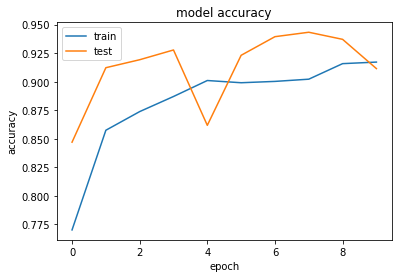

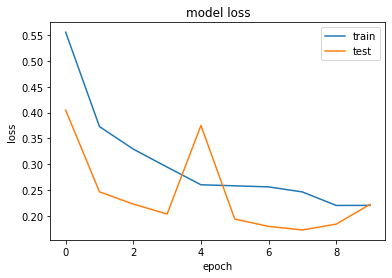

In [ ]:
plot_acc_loss(history)

The reason for the difference in observations is that the range of input numbers is the same for both, but the second activation function changes the range of output numbers greatly. To solve the problem of both, we can use data normalization.<br/>
As we can see in the above outputs we have a much better result by normalizing the data. For the best F1-score, by trying different modes such as increasing or decreasing the number of neurons or increasing or decreasing the number of layers, the above model gives us the best result at the most appropriate time.

## Optimizer

### momentum = 0.5

In [ ]:
input = layers.Input(shape=(80,80,1))
inp = layers.Flatten()(input)
second = layers.Dense(1024,activation='relu')(inp)
third = layers.Dense(1024,activation='relu')(second)
out = layers.Dense(3,activation='softmax')(third)

model = models.Model(inputs=input, outputs=out)

model.compile(optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.5),loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(dataTrain, validation_data=dataTest, epochs=10)

Epoch 1/10
161/161 [==============================] - 148s 916ms/step - loss: 0.6155 - accuracy: 0.7547 - val_loss: 0.2516 - val_accuracy: 0.9130
Epoch 2/10
161/161 [==============================] - 147s 913ms/step - loss: 0.3278 - accuracy: 0.8671 - val_loss: 0.2027 - val_accuracy: 0.9293
Epoch 3/10
161/161 [==============================] - 147s 917ms/step - loss: 0.3013 - accuracy: 0.8801 - val_loss: 0.2090 - val_accuracy: 0.9224
Epoch 4/10
161/161 [==============================] - 147s 916ms/step - loss: 0.2595 - accuracy: 0.8992 - val_loss: 0.2506 - val_accuracy: 0.9099
Epoch 5/10
161/161 [==============================] - 148s 920ms/step - loss: 0.2449 - accuracy: 0.9094 - val_loss: 0.2688 - val_accuracy: 0.8936
Epoch 6/10
161/161 [==============================] - 144s 897ms/step - loss: 0.2448 - accuracy: 0.9031 - val_loss: 0.1744 - val_accuracy: 0.9433
Epoch 7/10
161/161 [==============================] - 144s 894ms/step - loss: 0.2306 - accuracy: 0.9114 - val_loss: 0.1661 -

In [ ]:
r_p_f(model)

--------------TRAIN--------------
              precision    recall  f1-score   support

    Covid 19       0.97      0.85      0.91       460
      Normal       0.85      0.93      0.89      1266
   Pneumonia       0.96      0.94      0.95      3418

    accuracy                           0.93      5144
   macro avg       0.93      0.91      0.92      5144
weighted avg       0.94      0.93      0.93      5144

--------------TEST--------------
              precision    recall  f1-score   support

    Covid 19       0.97      0.83      0.89       116
      Normal       0.86      0.94      0.90       317
   Pneumonia       0.96      0.95      0.96       855

    accuracy                           0.94      1288
   macro avg       0.93      0.91      0.92      1288
weighted avg       0.94      0.94      0.94      1288



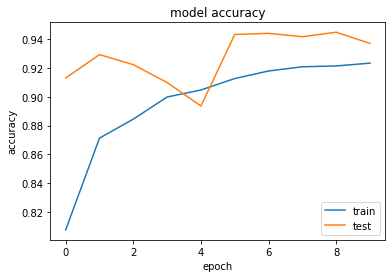

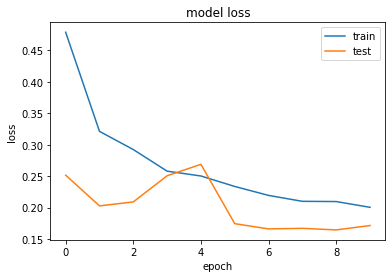

In [ ]:
plot_acc_loss(history)

### momentum = 0.9

In [ ]:
input = layers.Input(shape=(80,80,1))
inp = layers.Flatten()(input)
second = layers.Dense(1024,activation='relu')(inp)
third = layers.Dense(1024,activation='relu')(second)
out = layers.Dense(3,activation='softmax')(third)

model = models.Model(inputs=input, outputs=out)

model.compile(optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.9),loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(dataTrain, validation_data=dataTest, epochs=10)

Epoch 1/10
161/161 [==============================] - 147s 913ms/step - loss: 0.6200 - accuracy: 0.7543 - val_loss: 0.3253 - val_accuracy: 0.8843
Epoch 2/10
161/161 [==============================] - 146s 907ms/step - loss: 0.3628 - accuracy: 0.8592 - val_loss: 0.2568 - val_accuracy: 0.9014
Epoch 3/10
161/161 [==============================] - 144s 894ms/step - loss: 0.3075 - accuracy: 0.8818 - val_loss: 0.2624 - val_accuracy: 0.9092
Epoch 4/10
161/161 [==============================] - 144s 892ms/step - loss: 0.2798 - accuracy: 0.8926 - val_loss: 0.1814 - val_accuracy: 0.9371
Epoch 5/10
161/161 [==============================] - 143s 891ms/step - loss: 0.2730 - accuracy: 0.8942 - val_loss: 0.1859 - val_accuracy: 0.9348
Epoch 6/10
161/161 [==============================] - 143s 889ms/step - loss: 0.2461 - accuracy: 0.9085 - val_loss: 0.2375 - val_accuracy: 0.9193
Epoch 7/10
161/161 [==============================] - 144s 893ms/step - loss: 0.2262 - accuracy: 0.9163 - val_loss: 0.2589 -

In [ ]:
r_p_f(model)

--------------TRAIN--------------
              precision    recall  f1-score   support

    Covid 19       0.96      0.77      0.86       460
      Normal       0.96      0.73      0.83      1266
   Pneumonia       0.89      0.99      0.94      3418

    accuracy                           0.91      5144
   macro avg       0.94      0.83      0.87      5144
weighted avg       0.91      0.91      0.90      5144

--------------TEST--------------
              precision    recall  f1-score   support

    Covid 19       0.99      0.74      0.85       116
      Normal       0.94      0.76      0.84       317
   Pneumonia       0.89      0.99      0.94       855

    accuracy                           0.91      1288
   macro avg       0.94      0.83      0.88      1288
weighted avg       0.92      0.91      0.91      1288



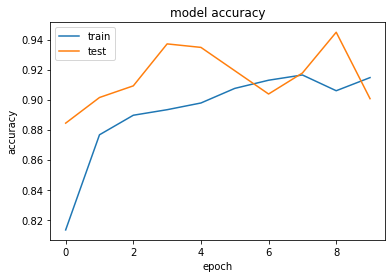

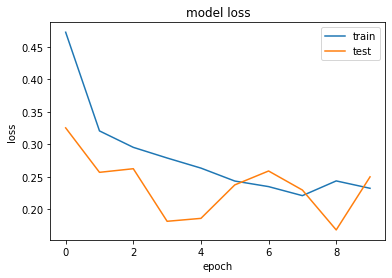

In [ ]:
plot_acc_loss(history)

### momentum = 0.99

In [ ]:
input = layers.Input(shape=(80,80,1))
inp = layers.Flatten()(input)
second = layers.Dense(1024,activation='relu')(inp)
third = layers.Dense(512,activation='relu')(second)
out = layers.Dense(3,activation='softmax')(third)

model = models.Model(inputs=input, outputs=out)

model.compile(optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.99),loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(dataTrain, validation_data=dataTest, epochs=10)

Epoch 1/10
161/161 [==============================] - 146s 907ms/step - loss: 0.9157 - accuracy: 0.6478 - val_loss: 0.4679 - val_accuracy: 0.8339
Epoch 2/10
161/161 [==============================] - 144s 892ms/step - loss: 0.4868 - accuracy: 0.8524 - val_loss: 0.7826 - val_accuracy: 0.8385
Epoch 3/10
161/161 [==============================] - 143s 891ms/step - loss: 1.0487 - accuracy: 0.7379 - val_loss: 0.8304 - val_accuracy: 0.6848
Epoch 4/10
161/161 [==============================] - 143s 889ms/step - loss: 0.8390 - accuracy: 0.6762 - val_loss: 0.8725 - val_accuracy: 0.6638
Epoch 5/10
161/161 [==============================] - 144s 895ms/step - loss: 0.8507 - accuracy: 0.6544 - val_loss: 0.8397 - val_accuracy: 0.6638
Epoch 6/10
161/161 [==============================] - 144s 895ms/step - loss: 0.8364 - accuracy: 0.6614 - val_loss: 0.8361 - val_accuracy: 0.6638
Epoch 7/10
161/161 [==============================] - 143s 892ms/step - loss: 0.8380 - accuracy: 0.6642 - val_loss: 0.8347 -

In [ ]:
r_p_f(model)

--------------TRAIN--------------


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    Covid 19       0.00      0.00      0.00       460
      Normal       0.00      0.00      0.00      1266
   Pneumonia       0.66      1.00      0.80      3418

    accuracy                           0.66      5144
   macro avg       0.22      0.33      0.27      5144
weighted avg       0.44      0.66      0.53      5144

--------------TEST--------------
              precision    recall  f1-score   support

    Covid 19       0.00      0.00      0.00       116
      Normal       0.00      0.00      0.00       317
   Pneumonia       0.66      1.00      0.80       855

    accuracy                           0.66      1288
   macro avg       0.22      0.33      0.27      1288
weighted avg       0.44      0.66      0.53      1288



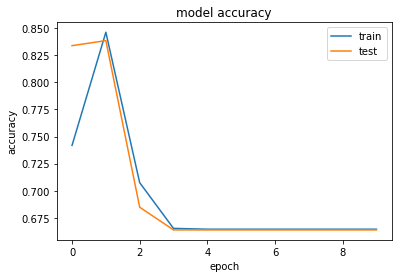

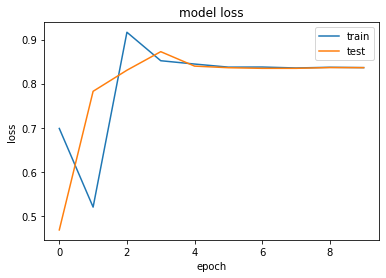

In [ ]:
plot_acc_loss(history)

Momentum or SGD with momentum is method which helps accelerate gradients vectors in the right directions, thus leading to faster converging. In other words its a moving average of our gradients.<br/><br/>
With Stochastic Gradient Descent we don’t compute the exact derivate of our loss function. Instead, we’re estimating it on a small batch. Which means we’re not always going in the optimal direction, because our derivatives are ‘noisy’. So, exponentially weighed averages can provide us a better estimate which is closer to the actual derivate than our noisy calculations. This is one reason why momentum might work better. <br/><br/>
We tried three modes for momentum. As the momentum increases exponentially, the speed of our movement towards the answer increases in such a way that it becomes difficult to reach it. It is better to move slower as we get closer to the answer. But if the momentum is too small, it will cause us to get stuck in the local minimum and not reach the ideal answer. In the three tested cases, momentum values ​​of 0.5 and 0.9 had better answers.

### Adam

In [ ]:
input = layers.Input(shape=(80,80,1))
inp = layers.Flatten()(input)
second = layers.Dense(1024,activation='relu')(inp)
third = layers.Dense(1024,activation='relu')(second)
out = layers.Dense(3,activation='softmax')(third)

model = models.Model(inputs=input, outputs=out)

model.compile(optimizer=optimizers.Adam() ,loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(dataTrain, validation_data=dataTest, epochs=10)

Epoch 1/10
161/161 [==============================] - 144s 895ms/step - loss: 1.6241 - accuracy: 0.7113 - val_loss: 0.2371 - val_accuracy: 0.9076
Epoch 2/10
161/161 [==============================] - 143s 890ms/step - loss: 0.3657 - accuracy: 0.8575 - val_loss: 0.4211 - val_accuracy: 0.8269
Epoch 3/10
161/161 [==============================] - 144s 894ms/step - loss: 0.3421 - accuracy: 0.8679 - val_loss: 0.2083 - val_accuracy: 0.9231
Epoch 4/10
161/161 [==============================] - 143s 892ms/step - loss: 0.2958 - accuracy: 0.8833 - val_loss: 0.1817 - val_accuracy: 0.9332
Epoch 5/10
161/161 [==============================] - 143s 891ms/step - loss: 0.2598 - accuracy: 0.9042 - val_loss: 0.2472 - val_accuracy: 0.9022
Epoch 6/10
161/161 [==============================] - 143s 889ms/step - loss: 0.2467 - accuracy: 0.9093 - val_loss: 0.1683 - val_accuracy: 0.9340
Epoch 7/10
161/161 [==============================] - 143s 887ms/step - loss: 0.2717 - accuracy: 0.8997 - val_loss: 0.1685 -

In [ ]:
r_p_f(model)

--------------TRAIN--------------
              precision    recall  f1-score   support

    Covid 19       0.71      0.95      0.82       460
      Normal       0.88      0.91      0.90      1266
   Pneumonia       0.97      0.91      0.94      3418

    accuracy                           0.92      5144
   macro avg       0.86      0.93      0.89      5144
weighted avg       0.93      0.92      0.92      5144

--------------TEST--------------
              precision    recall  f1-score   support

    Covid 19       0.69      0.95      0.80       116
      Normal       0.88      0.93      0.90       317
   Pneumonia       0.97      0.90      0.94       855

    accuracy                           0.91      1288
   macro avg       0.85      0.93      0.88      1288
weighted avg       0.92      0.91      0.92      1288



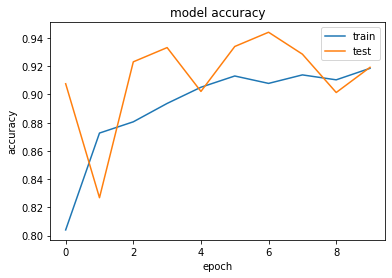

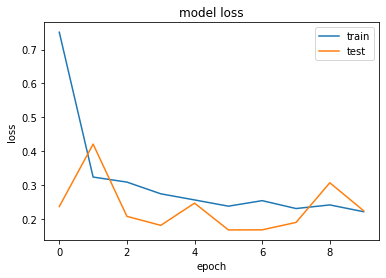

In [ ]:
plot_acc_loss(history)

Adam is much faster than SGD, the default hyperparameters usually work fine. But as we can see Adam has convergence problems that often SGD + momentum can converge better with longer training time.

## Epochs

In [ ]:
input = layers.Input(shape=(80,80,1))
inp = layers.Flatten()(input)
second = layers.Dense(1024,activation='relu')(inp)
third = layers.Dense(1024,activation='relu')(second)
out = layers.Dense(3,activation='softmax')(third)

model = models.Model(inputs=input, outputs=out)

model.compile(optimizer=optimizers.Adam(learning_rate=0.001) ,loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(dataTrain, validation_data=dataTest, epochs=20)

Epoch 1/20
161/161 [==============================] - 145s 901ms/step - loss: 1.7349 - accuracy: 0.7041 - val_loss: 0.3097 - val_accuracy: 0.8859
Epoch 2/20
161/161 [==============================] - 142s 885ms/step - loss: 0.3445 - accuracy: 0.8678 - val_loss: 0.3689 - val_accuracy: 0.8540
Epoch 3/20
161/161 [==============================] - 144s 892ms/step - loss: 0.3048 - accuracy: 0.8896 - val_loss: 0.2368 - val_accuracy: 0.9107
Epoch 4/20
161/161 [==============================] - 143s 889ms/step - loss: 0.3180 - accuracy: 0.8783 - val_loss: 0.2092 - val_accuracy: 0.9255
Epoch 5/20
161/161 [==============================] - 143s 887ms/step - loss: 0.2422 - accuracy: 0.9078 - val_loss: 0.2405 - val_accuracy: 0.9053
Epoch 6/20
161/161 [==============================] - 144s 898ms/step - loss: 0.2659 - accuracy: 0.9006 - val_loss: 0.2185 - val_accuracy: 0.9185
Epoch 7/20
161/161 [==============================] - 143s 892ms/step - loss: 0.2580 - accuracy: 0.8988 - val_loss: 0.2295 -

In [ ]:
r_p_f(model)

--------------TRAIN--------------
              precision    recall  f1-score   support

    Covid 19       0.91      0.96      0.93       460
      Normal       0.93      0.91      0.92      1266
   Pneumonia       0.96      0.97      0.97      3418

    accuracy                           0.95      5144
   macro avg       0.94      0.94      0.94      5144
weighted avg       0.95      0.95      0.95      5144

--------------TEST--------------
              precision    recall  f1-score   support

    Covid 19       0.90      0.91      0.91       116
      Normal       0.91      0.92      0.92       317
   Pneumonia       0.97      0.96      0.96       855

    accuracy                           0.95      1288
   macro avg       0.93      0.93      0.93      1288
weighted avg       0.95      0.95      0.95      1288



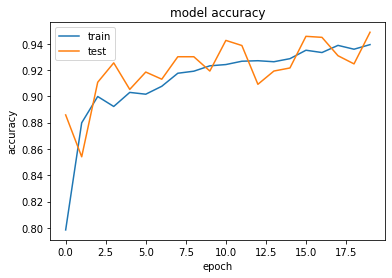

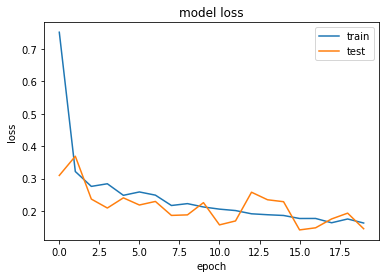

In [ ]:
plot_acc_loss(history)

The reason for training neural networks for several epochs is to perform the backpropagation process and update the weights to achieve a more accurate network. <br/><br/>
But after a certain number of epochs, the accuracy of our train data continues to increase slightly, but the accuracy of the test data gradually decreases, indicating overfitting. To prevent the problem of overfitting, we use a concept called early stopping. When we realize that our network is getting overfit, we end the network training.

## Loss function

In [ ]:
input = layers.Input(shape=(80,80,1))
inp = layers.Flatten()(input)
second = layers.Dense(1024,activation='relu')(inp)
third = layers.Dense(1024,activation='relu')(second)
out = layers.Dense(3,activation='softmax')(third)

model = models.Model(inputs=input, outputs=out)

model.compile(optimizer=optimizers.Adam(learning_rate=0.001) ,loss='mean_squared_error', metrics=['accuracy'])

history = model.fit(dataTrain, validation_data=dataTest, epochs=20)

Epoch 1/20
161/161 [==============================] - 146s 908ms/step - loss: 0.2172 - accuracy: 0.6553 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 2/20
161/161 [==============================] - 145s 901ms/step - loss: 0.2312 - accuracy: 0.6531 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 3/20
161/161 [==============================] - 143s 891ms/step - loss: 0.2202 - accuracy: 0.6696 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 4/20
161/161 [==============================] - 143s 888ms/step - loss: 0.2196 - accuracy: 0.6705 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 5/20
161/161 [==============================] - 143s 887ms/step - loss: 0.2262 - accuracy: 0.6607 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 6/20
161/161 [==============================] - 143s 888ms/step - loss: 0.2295 - accuracy: 0.6558 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 7/20
161/161 [==============================] - 143s 888ms/step - loss: 0.2274 - accuracy: 0.6589 - val_loss: 0.2241 -

In [ ]:
r_p_f(model)

--------------TRAIN--------------


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    Covid 19       0.00      0.00      0.00       460
      Normal       0.00      0.00      0.00      1266
   Pneumonia       0.66      1.00      0.80      3418

    accuracy                           0.66      5144
   macro avg       0.22      0.33      0.27      5144
weighted avg       0.44      0.66      0.53      5144

--------------TEST--------------
              precision    recall  f1-score   support

    Covid 19       0.00      0.00      0.00       116
      Normal       0.00      0.00      0.00       317
   Pneumonia       0.66      1.00      0.80       855

    accuracy                           0.66      1288
   macro avg       0.22      0.33      0.27      1288
weighted avg       0.44      0.66      0.53      1288



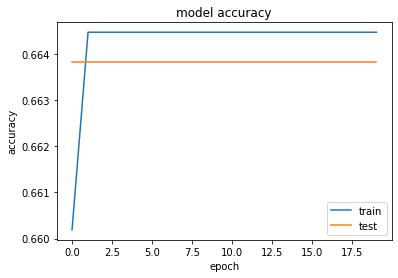

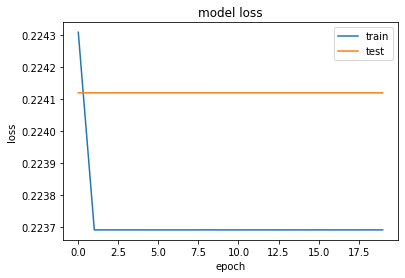

In [ ]:
plot_acc_loss(history)

As can be seen from the plots or the result of the report, the loss value is constant and the weights are not updated. The reason that it gets a good answer on data with pneumonia label is that most of our data is related to this label.<br/> <br/>
Using MSE means that we assume that the underlying data has been generated from a normal distribution. While in reality, a dataset that can be classified into two categories is not from a normal distribution exactly like our train data here. In the case of regression problems where a quantity is predicted, it is common to use the MSE loss function.

## Regularization

### regularization L2

In [ ]:
input = layers.Input(shape=(80,80,1))
inp = layers.Flatten()(input)
second = layers.Dense(1024,activation='relu', kernel_regularizer=regularizers.l2(0.0001))(inp)
third = layers.Dense(1024,activation='relu', kernel_regularizer=regularizers.l2(0.0001))(second)
out = layers.Dense(3,activation='softmax', kernel_regularizer=regularizers.l2(0.0001))(third)

model = models.Model(inputs=input, outputs=out)

model.compile(optimizer=optimizers.Adam(learning_rate=0.001) ,loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(dataTrain, validation_data=dataTest, epochs=20)

Epoch 1/20
161/161 [==============================] - 143s 881ms/step - loss: 2.1043 - accuracy: 0.7021 - val_loss: 0.4483 - val_accuracy: 0.8828
Epoch 2/20
161/161 [==============================] - 142s 882ms/step - loss: 0.4731 - accuracy: 0.8732 - val_loss: 0.4062 - val_accuracy: 0.9115
Epoch 3/20
161/161 [==============================] - 141s 878ms/step - loss: 0.4179 - accuracy: 0.8954 - val_loss: 0.3300 - val_accuracy: 0.9231
Epoch 4/20
161/161 [==============================] - 141s 879ms/step - loss: 0.3746 - accuracy: 0.8962 - val_loss: 0.4669 - val_accuracy: 0.8649
Epoch 5/20
161/161 [==============================] - 141s 877ms/step - loss: 0.3794 - accuracy: 0.8988 - val_loss: 0.2978 - val_accuracy: 0.9185
Epoch 6/20
161/161 [==============================] - 140s 874ms/step - loss: 0.3326 - accuracy: 0.9075 - val_loss: 0.2832 - val_accuracy: 0.9239
Epoch 7/20
161/161 [==============================] - 140s 872ms/step - loss: 0.3124 - accuracy: 0.9097 - val_loss: 0.2750 -

In [ ]:
r_p_f(model)

--------------TRAIN--------------
              precision    recall  f1-score   support

    Covid 19       0.98      0.85      0.91       460
      Normal       0.78      0.97      0.87      1266
   Pneumonia       0.98      0.90      0.94      3418

    accuracy                           0.92      5144
   macro avg       0.91      0.91      0.90      5144
weighted avg       0.93      0.92      0.92      5144

--------------TEST--------------
              precision    recall  f1-score   support

    Covid 19       0.98      0.80      0.88       116
      Normal       0.80      0.98      0.88       317
   Pneumonia       0.98      0.92      0.95       855

    accuracy                           0.92      1288
   macro avg       0.92      0.90      0.90      1288
weighted avg       0.93      0.92      0.92      1288



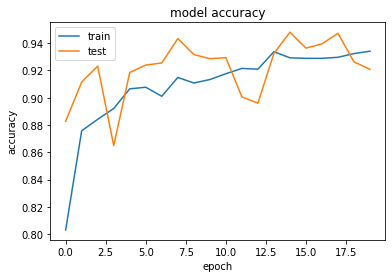

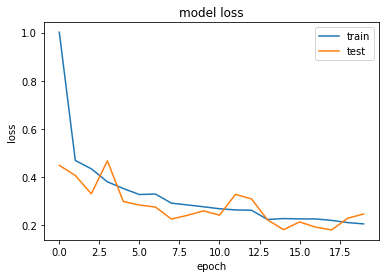

In [ ]:
plot_acc_loss(history)

In L2 regularization we add a fraction of the sum of the squared weight values to the base error. On each training iteration, each weight is decayed toward zero by a small fraction of the weight's current value. So as we can see the values of weight matrices decrease because it assumes that a neural network with smaller weight matrices leads to simpler models. Therefore, it will also reduce overfitting to quite an extent.

### dropout

In [ ]:
input = layers.Input(shape=(80,80,1))
inp = layers.Flatten()(input)
second = layers.Dense(1024,activation='relu')(inp)
dropout = layers.Dropout(rate=0.1)(second)
third = layers.Dense(1024,activation='relu')(dropout)
dropout = layers.Dropout(rate=0.1)(third)
out = layers.Dense(3,activation='softmax')(dropout)

model = models.Model(inputs=input, outputs=out)

model.compile(optimizer=optimizers.Adam(learning_rate=0.001) ,loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(dataTrain, validation_data=dataTest, epochs=20)

Epoch 1/20
161/161 [==============================] - 144s 889ms/step - loss: 1.7419 - accuracy: 0.6947 - val_loss: 0.2761 - val_accuracy: 0.8936
Epoch 2/20
161/161 [==============================] - 143s 888ms/step - loss: 0.3666 - accuracy: 0.8549 - val_loss: 0.2067 - val_accuracy: 0.9293
Epoch 3/20
161/161 [==============================] - 142s 880ms/step - loss: 0.3172 - accuracy: 0.8802 - val_loss: 0.3553 - val_accuracy: 0.8385
Epoch 4/20
161/161 [==============================] - 142s 884ms/step - loss: 0.3201 - accuracy: 0.8784 - val_loss: 0.2390 - val_accuracy: 0.9045
Epoch 5/20
161/161 [==============================] - 142s 885ms/step - loss: 0.2881 - accuracy: 0.8830 - val_loss: 0.1911 - val_accuracy: 0.9348
Epoch 6/20
161/161 [==============================] - 142s 886ms/step - loss: 0.2790 - accuracy: 0.8967 - val_loss: 0.1850 - val_accuracy: 0.9387
Epoch 7/20
161/161 [==============================] - 142s 885ms/step - loss: 0.2767 - accuracy: 0.8964 - val_loss: 0.2187 -

In [ ]:
r_p_f(model)

--------------TRAIN--------------
              precision    recall  f1-score   support

    Covid 19       0.91      0.89      0.90       460
      Normal       0.92      0.88      0.90      1266
   Pneumonia       0.95      0.97      0.96      3418

    accuracy                           0.94      5144
   macro avg       0.93      0.91      0.92      5144
weighted avg       0.94      0.94      0.94      5144

--------------TEST--------------
              precision    recall  f1-score   support

    Covid 19       0.90      0.91      0.90       116
      Normal       0.89      0.90      0.90       317
   Pneumonia       0.96      0.95      0.96       855

    accuracy                           0.94      1288
   macro avg       0.92      0.92      0.92      1288
weighted avg       0.94      0.94      0.94      1288



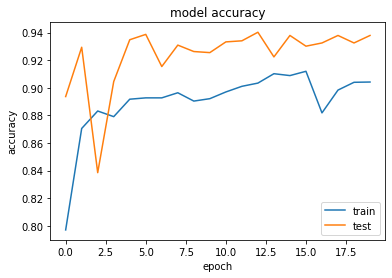

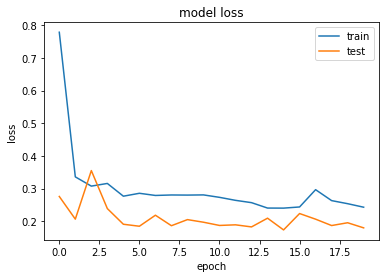

In [ ]:
plot_acc_loss(history)

In this kind of regularization at every iteration, it randomly selects some nodes and removes them along with all of their incoming and outgoing connections. So each iteration has a different set of nodes and this results in a different set of outputs. Dropout performs better than a normal neural network model.